# JPY/INR

In [112]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv(r'C:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [114]:
jpy_inr = df.loc[df['Currency Pair']=='JPY/INR']
jpy_inr.reset_index(drop=True,inplace=True)


In [115]:
import swing_technical_indicators 

In [116]:
print(dir(swing_technical_indicators))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'calculate_100ema', 'calculate_200ema', 'calculate_50ema', 'calculate_bollinger_bands', 'calculate_macd', 'calculate_rsi', 'calculate_swing_support_resistance', 'indicators']


1. ADFuller Test 

In [117]:
jpy_inr['Date']= pd.to_datetime(jpy_inr['Date'])

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\2019296255.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

for i in jpy_inr.columns : 
  if i!='Currency Pair' :
    print("ADFuller test for column : ",i)
    check_stationarity(jpy_inr[i])

ADFuller test for column :  Date
ADF Statistic: 0.872360
p-value: 0.992719
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Open_price
ADF Statistic: -1.854371
p-value: 0.353821
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_high
ADF Statistic: -1.939119
p-value: 0.313888
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_low
ADF Statistic: -1.828493
p-value: 0.366410
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test fo

# Decomposition

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

def deseasonalize_column(data, column, period=7):
    """
    Deseasonalizes a column by decomposing it into trend, seasonality, and residual components.
    
    Parameters:
    - data (pd.DataFrame): The DataFrame containing the time series data.
    - column (str): The name of the column to deseasonalize.
    - period (int): The periodicity of the data (e.g., 7 for weekly seasonality).
    
    Returns:
    - pd.Series: The deseasonalized version of the column.
    """
    # Decompose the column
    decomposition = seasonal_decompose(data[column], model='additive', period=period, extrapolate_trend='freq')
    
    # Extract the residual component as deseasonalized data
    deseasonalized = data[column] - decomposition.seasonal
    
    return deseasonalized

# Identify non-stationary columns
non_stationary_columns = ['Day_high', 'Day_low', 'Open_price']

# Create deseasonalized columns
for col in non_stationary_columns:
    deseasonalized_col = deseasonalize_column(jpy_inr, col, period=14)  # Adjust the period as needed
    jpy_inr[f'Deseasonalized_{col}'] = deseasonalized_col


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\1611286044.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\1611286044.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\1611286044.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [120]:
jpy_inr 

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601
...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954


## EMA 100 Feature 

In [121]:
jpy_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(jpy_inr, 'Closing_price', 100)
jpy_inr

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\1505622001.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589
...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598


## EMA 200 

In [122]:
jpy_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(jpy_inr, 'Closing_price', 200)
jpy_inr

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\1960885368.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727
...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076


## EMA 50 

In [123]:
jpy_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(jpy_inr, 'Closing_price', 50)
jpy_inr

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\4069695575.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329


## RSI Feature 

In [124]:
jpy_inr['RSI'] = swing_technical_indicators.calculate_rsi(jpy_inr,'Closing_price',21)
jpy_inr

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\1394544658.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870,0.000000
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872,0.000000
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676,0.000000
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486,0.000000
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381,33.994372
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777,33.482909
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047,20.722433
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329,22.265871


In [125]:
import plotly.express as px 
px.line(jpy_inr['RSI'])

## MACD

In [126]:
jpy_inr_macd = swing_technical_indicators.calculate_macd(jpy_inr, column_name='Closing_price', short_period=12, long_period=26, signal_period=9)

for i in jpy_inr_macd.columns:

    jpy_inr[f"{i}"] = jpy_inr_macd[f'{i}']

jpy_inr


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_14668\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870,0.000000,0.000000,0.000000e+00,0.000000
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872,0.000000,0.000005,9.572650e-07,0.000004
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676,0.000000,-0.000396,-7.842673e-05,-0.000318
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486,0.000000,-0.000708,-2.043055e-04,-0.000504
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324,0.000000,-0.000901,-3.436465e-04,-0.000557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381,33.994372,-0.006265,-5.093533e-03,-0.001171
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777,33.482909,-0.006417,-5.358170e-03,-0.001059
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047,20.722433,-0.006766,-5.639814e-03,-0.001127
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329,22.265871,-0.006999,-5.911680e-03,-0.001087


## Bollinger Bands 

In [127]:
bollinger_data = swing_technical_indicators.calculate_bollinger_bands(jpy_inr['Closing_price'])

jpy_inr = jpy_inr.join(bollinger_data)
jpy_inr.drop('Price',axis=1, inplace=True)

c:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:202: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:203: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [128]:

X = jpy_inr.drop(['Date','Open_price','Day_high','Day_low','Closing_price','Currency Pair'],axis=1)
y =jpy_inr['Closing_price']

## Scaling

In [159]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
X

array([[0.12750387, 0.13016795, 0.13911194, ..., 0.06016575, 0.08681542,
        0.0929123 ],
       [0.1289347 , 0.13505452, 0.13890305, ..., 0.06016575, 0.08681542,
        0.0929123 ],
       [0.10256825, 0.11211547, 0.11593977, ..., 0.06016575, 0.08681542,
        0.0929123 ],
       ...,
       [0.18048526, 0.18795948, 0.19736561, ..., 0.24378315, 0.28115751,
        0.24104568],
       [0.17793893, 0.1871051 , 0.19854905, ..., 0.23445059, 0.26063723,
        0.24419478],
       [0.17300236, 0.1968952 , 0.19430425, ..., 0.22810373, 0.25301585,
        0.23998129]])

## Supervised ML Models 

In [160]:
#Step 2: Define the model functions
# Random Forest Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
def random_forest_model(X,y):
    rf = RandomForestRegressor()
    rf_metrics = {}

        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
        # Fit the model
    rf.fit(X_train, y_train)
        
        # Predict and calculate MAE
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    rf_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nRandom Forest Metrics :", rf_metrics)
        
        
       



random_forest_model(X,y)



Mean Absolute Error : 0.0015484227912932102
Mean Absolute Percentage Error (MAPE): 0.2543001179913758%
R-squared (R^2): 0.9984130389864618 

Random Forest Metrics : {'MACD_Histogram': {'MAE': 0.0015484227912932102, 'MAPE': 0.2543001179913758, 'R^2': 0.9984130389864618}}


## SVM 

In [161]:
from sklearn.svm import SVR
# SVM Model
def svm_model(X,y):
    svm = SVR()
    svm_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        

    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Predict
    y_pred = svm.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2) : {r2}")
    
    svm_metrics = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}
    
    print("\nSVM Metrics :", svm_metrics)


svm_model(X,y)

Mean Absolute Error : 0.043783911716802584
Mean Absolute Percentage Error : 7.365609230607505%
R-squared (R^2) : 0.08953031861182348

SVM Metrics : {'MAE': 0.043783911716802584, 'MAPE': 7.365609230607505, 'R^2': 0.08953031861182348}


## Hyperparameter tuning for SVM

In [162]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def svm_model_with_hyperparameter_tuning(X,y):
    
    
    # Initialize the SVM model
    svm = SVR()
    svm_metrics = {}
    
    # Define the hyperparameter grid to search over
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
        'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter in the loss function
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
    # Perform GridSearchCV to find the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters : {best_params}")
    
    # Get the best model
    best_svm = grid_search.best_estimator_
    
    # Make predictions with the best model
    y_pred = best_svm.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
    r2 = r2_score(y_test, y_pred)
    
    # Store the metrics for each currency pair
    svm_metrics= {
        'MAE': mae,
        'MAPE': mape,
        'R^2': r2
    }
    
    print(f"MAE : {mae}")
    print(f"MAPE : {mape}%")
    print(f"R^2 : {r2}")

# Return the metrics for all currency pairs
    return svm_metrics
  
svm_model_with_hyperparameter_tuning(X,y)

Best Hyperparameters : {'C': 0.1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
MAE : 0.040887477336344
MAPE : 6.80907593260912%
R^2 : 0.17896059543732878


{'MAE': 0.040887477336344,
 'MAPE': 6.80907593260912,
 'R^2': 0.17896059543732878}

## Gradient Boosting

In [163]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def gradient_boosting_model(X,y):
    
    gb = GradientBoostingRegressor()
    gb_metrics = {}

    
    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
        
        # Train the model
    gb.fit(X_train, y_train)
    
    # Predict
    y_pred = gb.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R^2): {r2}")
    
    gb_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nGradient Boosting Metrics ", gb_metrics)


gradient_boosting_model(X,y)

Mean Absolute Error: 0.001638738349436564
Mean Absolute Percentage Error (MAPE): 0.269067715571035%
R-squared (R^2): 0.9982716600930036

Gradient Boosting Metrics  {'MACD_Histogram': {'MAE': 0.001638738349436564, 'MAPE': 0.269067715571035, 'R^2': 0.9982716600930036}}


## KNN 

In [164]:
from sklearn.neighbors import KNeighborsRegressor


def knn_model(X,y):
    knn = KNeighborsRegressor()
    knn_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict
    y_pred = knn.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape * 100}%")
    print(f"R-squared (R^2): {r2}")
    
    knn_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}
    
    print("\nKNN Metrics for each currency pair:", knn_metrics)
    
 
knn_model(X,y)

Mean Absolute Error : 0.0022560717029449402
Mean Absolute Percentage Error (MAPE) : 0.37041503917950874%
R-squared (R^2): 0.9968504203360187

KNN Metrics for each currency pair: {'MACD_Histogram': {'MAE': 0.0022560717029449402, 'MAPE': 0.37041503917950874, 'R^2': 0.9968504203360187}}


## XGBoost

In [165]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [166]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def xgboost_model(X,y):
    # Split the data by currency pair
    xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
    xgb_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    xgb.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape * 100}%")
    print(f"R-squared (R^2) : {r2}")
    
    xgb_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nXGBoost Metrics :", xgb_metrics)
    


xgboost_model(X,y)


Mean Absolute Error : 0.0015448882630234636
Mean Absolute Percentage Error (MAPE) : 0.2545144179271431%
R-squared (R^2) : 0.9985164473658652

XGBoost Metrics : {'MACD_Histogram': {'MAE': 0.0015448882630234636, 'MAPE': 0.2545144179271431, 'R^2': 0.9985164473658652}}


## LightGBM

In [167]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [168]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def lightgbm_model(X,y):
    """
    Train and evaluate a LightGBM model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics.
    """
    # Initialize the LightGBM Regressor
    lgbm = LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=-1)

    

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    lgbm.fit(X_train, y_train)

    # Make predictions
    y_train_pred=lgbm.predict(X_train)
    y_pred = lgbm.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print("LightGBM Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R²): {r2}")
    print(f"Training Accuracy (R²): {train_r2}")
    print(f"Testing Accuracy (R²): {test_r2}")

# Example usage
lightgbm_model(X,y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 13
[LightGBM] [Info] Start training from score 0.610950
LightGBM Model Metrics:
Mean Absolute Error (MAE): 0.0014292941513059606
Mean Absolute Percentage Error (MAPE): 0.23639067139804892%
R-squared (R²): 0.998846305385373
Training Accuracy (R²): 0.9995987202505975
Testing Accuracy (R²): 0.998846305385373


## CatBoost

In [169]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [170]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def catboost_model(X,y):
    """
    Train and evaluate a CatBoost model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics, training, and testing accuracy scores.
    """
    # Initialize the CatBoost Regressor
    catboost = CatBoostRegressor(
        l2_leaf_reg=15,
        iterations=1000, 
        learning_rate=0.1, 
        depth=10, 
        loss_function='MAE',  # Can be changed to 'RMSE', etc., as needed
        verbose=0  # Set to 0 to suppress training logs
    )

    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    catboost.fit(X_train, y_train)

    # Make predictions
    y_train_pred = catboost.predict(X_train)  # Predictions on training data
    y_test_pred = catboost.predict(X_test)   # Predictions on testing data

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_test_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the metrics
    print(catboost.get_feature_importance())
    print("CatBoost Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R²) on Test Data: {r2}")
    print(f"Training Accuracy (R²): {train_r2}")
    print(f"Testing Accuracy (R²): {test_r2}")

# Example usage
catboost_model(X,y)


[ 9.10676415 11.47951109  7.95677465 20.84987737  3.6192939  14.49805574
  3.97757768  3.2893748   7.39124175  4.90585296  4.96569462  3.33903968
  4.62094163]
CatBoost Model Metrics:
Mean Absolute Error (MAE): 0.0019082141974858138
Mean Absolute Percentage Error (MAPE): 0.31229373436039604%
R-squared (R²) on Test Data: 0.9976060780044057
Training Accuracy (R²): 0.999879402667912
Testing Accuracy (R²): 0.9976060780044057


In [171]:
data = X.select_dtypes('number')
co = data.corr()
px.imshow(co)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

## Linear Regression 

In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate train and test accuracy (R-squared values)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Test): {r2}")
print(f"Train Accuracy (R-squared): {train_accuracy}")
print(f"Test Accuracy (R-squared): {test_accuracy}")

# If you want to see the coefficients of the model:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Absolute Error: 0.0009900973012305506
Mean Squared Error: 2.3027212114630098e-06
R-squared (Test): 0.9992084902065754
Train Accuracy (R-squared): 0.9993778105841905
Test Accuracy (R-squared): 0.9992084902065754
Coefficients: [ 1.51254325e-01  1.42957547e-01 -1.45038344e-01 -4.61710120e-03
  1.18671974e-03 -1.82656005e-02  4.24593472e-04 -3.15592625e+09
  2.63483371e+09  1.33741926e+09  4.50131687e+09 -2.41684824e+09
 -2.40880725e+09]
Intercept: -262609030.11421502


## MLPRegressor

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have a DataFrame 'df' where the last column is the target variable 'y'
# and all other columns are the features 'X'

# Example DataFrame (replace with your actual data)
# df = pd.read_csv('your_data.csv')


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor (Neural Network model)

mlp_model = MLPRegressor(hidden_layer_sizes=(150,), max_iter=2000, random_state=42,activation= 'relu')

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = mlp_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate train and test accuracy (R-squared values)
train_accuracy = mlp_model.score(X_train, y_train)
test_accuracy = mlp_model.score(X_test, y_test)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Test): {r2}")
print(f"Train Accuracy (R-squared): {train_accuracy}")
print(f"Test Accuracy (R-squared): {test_accuracy}")

# If you want to see the weights of the model:
print(f"Coefs: {mlp_model.coefs_}")
print(f"Intercepts: {mlp_model.intercepts_}")


Mean Absolute Error: 0.010720191427592379
Mean Squared Error: 0.00019770277304514736
R-squared (Test): 0.9320440180628656
Train Accuracy (R-squared): 0.9326962140000409
Test Accuracy (R-squared): 0.9320440180628656
Coefs: [array([[-7.47863243e-04,  3.37956910e-02,  3.25595547e-02, ...,
        -6.62296128e-03, -1.70832045e-01, -4.54709715e-03],
       [ 2.62851762e-02, -7.45903586e-03, -7.46290858e-02, ...,
        -1.15176597e-01,  4.90362335e-02, -2.73605498e-02],
       [-3.33495522e-02,  1.44818117e-05, -1.80270321e-03, ...,
         9.15709646e-02, -4.52952117e-02, -2.76751990e-02],
       ...,
       [ 4.95160525e-06, -5.90007666e-06, -9.96327085e-02, ...,
         1.31960459e-01,  1.15413021e-01,  3.78952924e-03],
       [-3.62847718e-02, -3.15399727e-03, -5.07476584e-02, ...,
        -1.57810552e-01, -1.57403583e-01, -4.10380040e-02],
       [ 3.48838013e-02,  5.64586797e-03, -3.15498949e-02, ...,
        -1.19825262e-01, -5.48434755e-02, -1.03021387e-04]]), array([[ 3.02502609

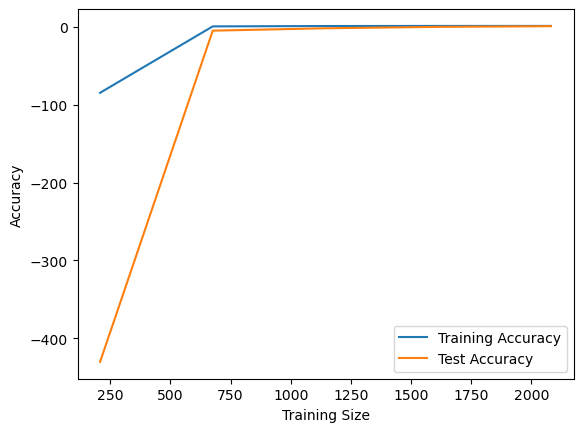

In [174]:
# Example of plotting learning curves using cross-validation
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(mlp_model, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
